In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [4]:
# Load the list from the text file
comm = []
with open('comm2.txt', 'r') as f:
    for line in f:
        comm.append(line.strip())

In [8]:
def func_find_threshold(num_words):
    # Sort the num_words list in descending order
    sorted_num_words = sorted(num_words, reverse=True)
    
    # Define the sample size as a percentage of the total data points
    sample_size_percent = 0.4  # Change this value as needed
    
    # Calculate the number of records to consider based on the sample size percentage
    num_records = int(len(sorted_num_words) * sample_size_percent)
    
    # Calculate the avg_topn as the average of the top n records
    n = int(sample_size_percent * 100)  # Change this value as needed
    avg_topn = sum(sorted_num_words[:n]) / n
    
    # Create a new list to store data points above the threshold
    above_threshold = [num for num in sorted_num_words if num >= avg_topn * 0.4]
    
    # Calculate the average of the above_threshold list
    average_above_threshold = sum(above_threshold) / len(above_threshold)
    
    print("Average of the top", n, "records:", avg_topn)
    print("Data points at least 40% or above the avg_topn:", above_threshold)
    print("Average of the data points above the threshold:", average_above_threshold)
    
    return min(above_threshold)


In [5]:
text_comm = [element for element in comm if any(char.isalpha() for char in element)]

print('the original comm file contains - ' + str(len(comm)) + ' lines of text')
print('after filtering for clear texts, the file contains - ' + str(len(text_comm)) + ' lines if text')

the original comm file contains - 444 lines of text
after filtering for clear texts, the file contains - 436 lines if text


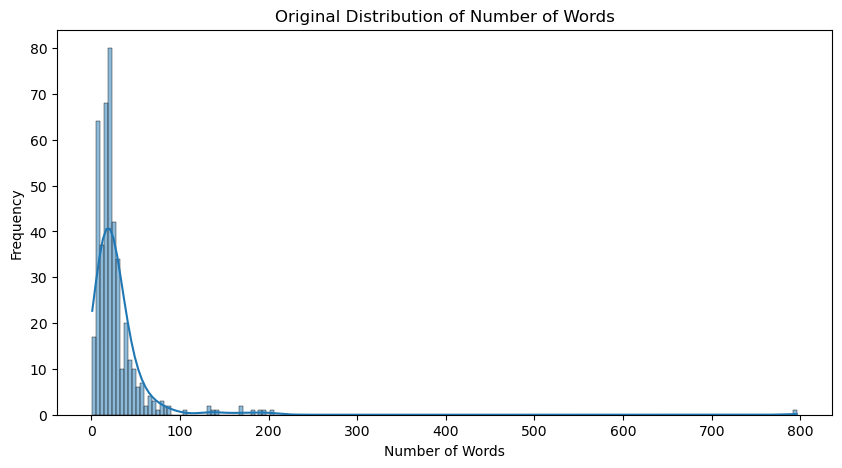

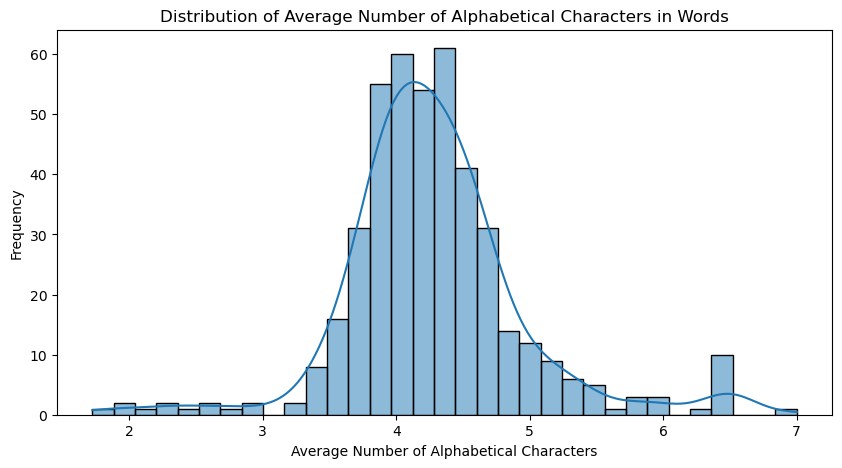

In [6]:
plt.figure(figsize=(10, 5))

# Calculate the number of words in each element
num_words = [len(text.split()) for text in text_comm]

# Plotting the distribution of the number of words
sns.histplot(num_words, kde=True)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Original Distribution of Number of Words')
plt.show()

plt.figure(figsize=(10, 5))

# Calculate the average number of alphabetical characters in each word
#avg_alphabet_chars = [sum(len(word) for word in text.split() if word.isalpha()) / len(text.split()) for text in filter_comm]
avg_alphabet_chars = [sum(len(re.findall('[a-zA-Z]', word)) for word in text.split()) / len(text.split()) for text in text_comm]

# Plotting the distribution of the average number of alphabetical characters
sns.histplot(avg_alphabet_chars, kde=True)
plt.xlabel('Average Number of Alphabetical Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Average Number of Alphabetical Characters in Words')
plt.show()


In [9]:
threshold = func_find_threshold(num_words)
text_comm2 = [element for element in text_comm if len(element.split()) >= threshold]

Average of the top 40 records: 110.225
Data points at least 40% or above the avg_topn: [796, 205, 197, 190, 182, 167, 167, 141, 136, 134, 134, 104, 89, 89, 83, 82, 81, 79, 77, 75, 70, 70, 68, 67, 65, 65, 64, 62, 60, 59, 59, 58, 56, 56, 56, 55, 54, 53, 52, 52, 51, 51, 50, 50, 50, 49, 47, 47, 47, 46, 46, 46, 45, 45]
Average of the data points above the threshold: 94.05555555555556


# POS analysis and data cleaning

In [10]:
# import spacy

# nlp = spacy.load('en_core_web_sm')

# pos_tags = []
# text = "After 70 league games spread over a period of a littleover 7 weeks, we finally have four survivors contesting to take home the prized IPL trophy. Will MI be 6th time champs? Can CSK grab a 5th title? Will Gujarat Titans continue their winning spree and defend their title or will Lucknow Super Giantsbecome a first time champions? Lot to play for as IPL 2023 reaches the home stretch with today's Qualifier 1. The Titans cruised through the league phase once again and were comfortably the best team on display, they just didn't confirm their place in the playoffs, but they did so emphatically. On the other hand, the Super Kings had to wait until their final game of the league, but they do have the knack of winning big moments, especially when playing at home. The winner of tonight's game will go through to Sunday's final while the loser will wait for tomorrow's winner in QF 2 on 26th in Ahmedabad. CSK not just have home advantage tonight, but they're the better rested team, having played their last league match on Saturday. On the other hand, Titans's last match spilled into the wee hours of yesterday and they'd to travel as well. Would that be a telling factor today?"

# doc = nlp(text)
# tags = [(token.text, token.pos_) for token in doc]
# tags

In [11]:
import spacy

nlp = spacy.load('en_core_web_sm')

pos_counts = []

for text in text_comm2:
    doc = nlp(text)
    pos_count = {}

    for token in doc:
        pos = token.pos_
        if pos in pos_count:
            pos_count[pos] += 1
        else:
            pos_count[pos] = 1

    pos_counts.append(pos_count)
# pos_counts

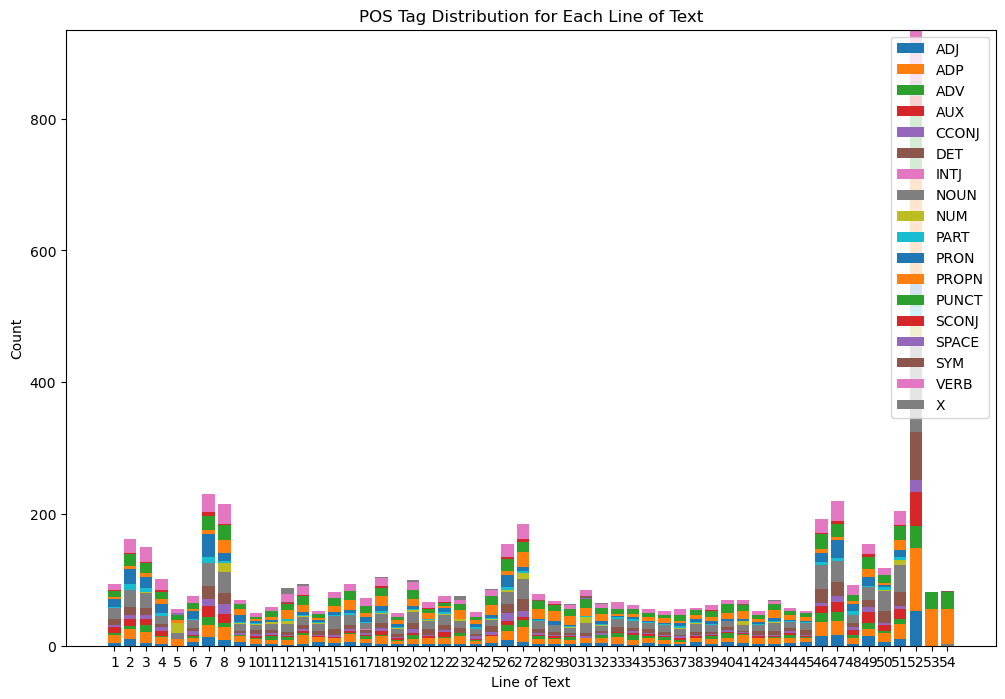

In [12]:
# Extract unique POS tags
unique_pos_tags = sorted(set([pos for pos_count in pos_counts for pos in pos_count.keys()]))

# Create an array to store the counts for each POS tag
pos_counts_array = np.zeros((len(pos_counts), len(unique_pos_tags)))

# Fill in the array with the counts
for i, pos_count in enumerate(pos_counts):
    for j, pos_tag in enumerate(unique_pos_tags):
        pos_counts_array[i, j] = pos_count.get(pos_tag, 0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
plt.bar(range(len(pos_counts)), pos_counts_array.T[0], label=unique_pos_tags[0])

for i in range(1, len(unique_pos_tags)):
    plt.bar(range(len(pos_counts)), pos_counts_array.T[i], bottom=np.sum(pos_counts_array.T[:i], axis=0),
            label=unique_pos_tags[i])

plt.xlabel('Line of Text')
plt.ylabel('Count')
plt.title('POS Tag Distribution for Each Line of Text')
plt.xticks(range(len(pos_counts)), range(1, len(pos_counts) + 1))
plt.legend(loc='upper right')
plt.show()

In [13]:
text_comm3 = []

for i, text in enumerate(text_comm2):
    pos_count = pos_counts[i]
    noun_count = pos_count.get('PROPN', 0)
    punctuation_count = pos_count.get('PUNCT', 0)
    total_count = sum(pos_count.values())

    if (noun_count + punctuation_count) / total_count <= 0.6:
        text_comm3.append(text)
text_comm3

["So, that's it from us for this game! Dhoni couldn't finish it off in style tonight but he tried his best. RR have gone to the top of the table with this win. We have witnessed close finishes in the last four days of the IPL and it has certainly kept us on the edge of our seats! Do join us tomorrow for another high-octane clash as PBKS have returned home and they will host GT. Till then, goodbye and cheers!",
 "Ravichandran Ashwin | Player of the Match: I surprise people I guess. Whenever I walk out to bat, people assume I just took that decision and came out, but that's a role given to me, we lost Sanju and I had to do a job. I am far better at judging my strengths, I take a few balls to get going. Every batting innings, I am padded up from the start. It's not an easy thing but it is good. I came off with good Test form. I feel I am able to get good grip and drop on the ball at the right lengths. If I was not able to do those things in the two years (with Punjab Kings) then I wouldn'

In [15]:
len(text_comm3)

52

# Calculating word frequency

In [69]:
nlp = spacy.load('en_core_web_sm')

word_counts = []
for i in range(len(text_comm3)):
    doc = nlp(text_comm3[i])
    # Calculate word frequencies, excluding stop words
    word_frequencies = {}
    for token in doc:
        word = token.text.lower()
        if word.isalpha() and word not in STOP_WORDS:
            if word not in word_frequencies:
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

    all_word_frequencies = [(word, freq) for word, freq in word_frequencies.items()]
    #print('received values for line' + str(i))
    word_counts.append(all_word_frequencies)
word_counts

[[('umpires', 1),
  ('walk', 1),
  ('ready', 1),
  ('lots', 1),
  ('yellow', 1),
  ('chepauk', 1),
  ('gt', 1),
  ('hope', 1),
  ('silence', 1),
  ('tonight', 1),
  ('big', 1),
  ('toss', 1),
  ('win', 1),
  ('hayden', 1),
  ('sure', 1),
  ('bat', 1),
  ('track', 1),
  ('captains', 1),
  ('think', 1),
  ('dew', 1),
  ('factor', 1),
  ('shami', 1),
  ('start', 1),
  ('titans', 1),
  ('slip', 1),
  ('place', 1)],
 [('runs', 1),
  ('preparation', 1),
  ('going', 1),
  ('tournament', 1),
  ('good', 1),
  ('injury', 1),
  ('free', 1),
  ('unlike', 1),
  ('time', 3),
  ('nature', 1),
  ('everytime', 1),
  ('consistent', 1),
  ('idea', 1),
  ('process', 1),
  ('assessing', 1),
  ('pitch', 2),
  ('deciding', 1),
  ('approach', 2),
  ('important', 2),
  ('play', 1),
  ('expressive', 1),
  ('cricket', 1),
  ('earlier', 1),
  ('odd', 1),
  ('balls', 1),
  ('lot', 1),
  ('depends', 1),
  ('situation', 1),
  ('left', 2),
  ('right', 1),
  ('combo', 1),
  ('opposition', 1),
  ('tactics', 1),
  ('cha